In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("C:/신보람/비어플/이상거래/credit2.csv")    # 수정해야 함
data

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284803,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,284804,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,284805,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,284806,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0,23


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

인덱스 변수, time, V20~V28 변수 제거

In [4]:
data.drop(['Unnamed: 0','Time','V20','V21','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  Amount  284807 non-null  float64
 20  Class   284807 non-null  int64  
 21  hour    28

Class 변수  ->  factor로 변환

In [5]:
data['Class']= data['Class'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   V1      284807 non-null  float64 
 1   V2      284807 non-null  float64 
 2   V3      284807 non-null  float64 
 3   V4      284807 non-null  float64 
 4   V5      284807 non-null  float64 
 5   V6      284807 non-null  float64 
 6   V7      284807 non-null  float64 
 7   V8      284807 non-null  float64 
 8   V9      284807 non-null  float64 
 9   V10     284807 non-null  float64 
 10  V11     284807 non-null  float64 
 11  V12     284807 non-null  float64 
 12  V13     284807 non-null  float64 
 13  V14     284807 non-null  float64 
 14  V15     284807 non-null  float64 
 15  V16     284807 non-null  float64 
 16  V17     284807 non-null  float64 
 17  V18     284807 non-null  float64 
 18  V19     284807 non-null  float64 
 19  Amount  284807 non-null  float64 
 20  Class   284807 non-null  c

## Splitting the Data

In [6]:
# set x and y
X = data.drop(['Class'],axis=1)
y = data['Class']

In [7]:
## scaling (robust)
num_f = ['Amount']
robustScaler = RobustScaler()
X[num_f] = robustScaler.fit_transform(X[num_f])

In [8]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,Amount,hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,1.783274,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.269825,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,4.983721,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,1.418291,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.670579,0


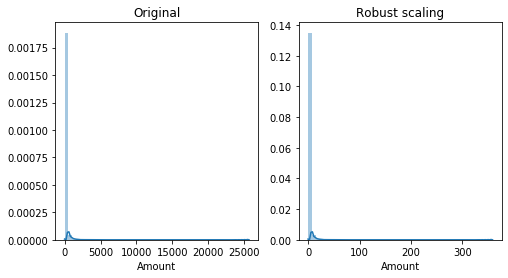

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.title('Original')
sns.distplot(data["Amount"])
plt.subplot(1, 2, 2)
plt.title('Robust scaling')
sns.distplot(X["Amount"])

In [10]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1234)

In [11]:
print("y_test의 class=1 비율 = ",len(y_test[y_test==1])/len(y_test))
print("y_train의 class=1 비율 = ",len(y_train[y_train==1])/len(y_train))

y_test의 class=1 비율 =  0.0017321489179921118
y_train의 class=1 비율 =  0.0017254870488152324


In [12]:
print("X_train 행 개수 : ", len(X_train))
print("X_test 행 개수 : ", len(X_test))

X_train 행 개수 :  199364
X_test 행 개수 :  85443


In [13]:
print(len(y_test[y_test==1]))
print(len(y_train[y_train==1]))
print(len(y_test[y_test==0]))
print(len(y_train[y_train==0]))

148
344
85295
199020


## 불균형 데이터 처리하기

In [14]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\qhfka\anaconda3\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


#### SMOTE & ENN

In [13]:
from imblearn.combine import SMOTEENN

In [16]:
sme = SMOTEENN()
X_train_smoteenn, y_train_smoteenn = sme.fit_resample(X_train, y_train)

In [17]:
X_train_smoteenn

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,Amount,hour
0,-3.161772,-2.304336,1.549989,3.683447,2.329421,-0.839534,0.038500,-0.264317,-0.533571,1.319748,...,-0.141608,1.023072,-0.952400,-0.920302,1.261546,-1.362170,0.070014,-1.570344,-0.293440,17
1,-0.381850,0.303814,-0.260084,-2.060956,1.214580,-0.549917,1.185789,-0.229375,-2.055704,0.090513,...,0.223249,0.256107,0.416376,-1.857052,-1.652979,-0.516275,1.267253,-0.791106,0.026549,21
2,-0.268462,0.943091,-1.913047,-0.714429,3.247672,3.441671,0.752988,0.916438,-0.604810,-0.312421,...,0.017176,-0.525750,0.683648,-0.584390,-0.692165,-0.329204,-0.545946,-0.468641,0.086076,13
3,-0.431498,0.254134,1.459409,0.203523,-0.192798,0.372215,0.676417,0.014669,-1.213470,-0.092191,...,0.551618,0.821373,-0.670888,-1.906871,-2.697865,0.690470,0.378801,-0.247457,0.815063,18
4,1.337094,0.410927,-0.816182,0.588511,0.973178,0.135806,0.460605,-0.129970,-0.499898,0.197029,...,0.611326,0.735738,0.555629,0.052117,0.460282,-1.220949,0.627082,0.681167,-0.147279,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398035,-1.737965,2.140737,-6.909512,5.268629,-2.642453,-2.142516,-5.146004,1.231326,-4.371160,-8.292023,...,-9.428884,-0.240780,-12.897698,-0.084257,-6.312898,-12.722117,-3.760272,0.875387,5.479856,23
398036,-26.457740,16.497470,-30.177320,8.904157,-17.892600,-1.227904,-31.197330,-11.438920,-9.462573,-22.187090,...,-10.592310,-0.703796,-3.926207,-2.400246,-6.809890,-12.462310,-5.501051,-0.567940,-0.293440,2
398037,-26.457740,16.497470,-30.177320,8.904157,-17.892600,-1.227904,-31.197330,-11.438920,-9.462573,-22.187090,...,-10.592310,-0.703796,-3.926207,-2.400246,-6.809890,-12.462310,-5.501051,-0.567940,-0.293440,2
398038,-15.161418,8.232649,-22.243631,11.890000,-8.643894,-2.313038,-16.123701,0.424966,-6.338522,-13.192928,...,-14.259780,0.703620,-14.054042,-0.324662,-8.080455,-12.154205,-4.803192,0.692865,-0.293440,5


In [19]:
print("Class=1 인 행: ",len(y_train_smoteenn[y_train_smoteenn==1]))
print("Class=0 인 행: ",len(y_train_smoteenn[y_train_smoteenn==0]))

199020
199020


#### SMOTE TOMEK

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt = SMOTETomek(random_state = 42)
X_train_smotetomek, y_train_smotetomek = smt.fit_resample(X_train, y_train)

In [ ]:
X_train_smotetomek

In [ ]:
print("Class=1 인 행: ",len(y_train_smotetomek[y_train_smotetomek==1]))
print("Class=0 인 행: ",len(y_train_smotetomek[y_train_smotetomek==0]))

# Modeling (Random Forest)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# # GridSearchCV를 통한 랜덤포레스트의 하이퍼 파라미터 튜닝
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators':[100],
#     'max_depth':[6,8,10,12],
#     'min_samples_leaf':[8,12,18],
#     'min_samples_split':[8,16,20]
# }

In [19]:
# rf = RandomForestClassifier(random_state=0,n_jobs=-1)
# gridcv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
# gridcv.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [21]:
# print("최적 파라미터: ", gridcv.best_params_)

최적 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}


In [22]:
rf = RandomForestClassifier(n_estimators=1000,
                            max_depth=12,
                           min_samples_leaf=8,
                           min_samples_split=20)
rf

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20)

In [23]:
## SMOTE & ENN 이용 (SMOTE TOMEK 이용하려면 데이터명 바꿔줌)
rf.fit(X_train_smoteenn,y_train_smoteenn)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20)

In [24]:
# 예측
y_pred = rf.predict(X_test)

 성능 평가

In [25]:
from sklearn import metrics

ac_score = metrics.accuracy_score(y_test, y_pred_1)
cl_report = metrics.classification_report(y_test, y_pred_1)
f1score = metrics.f1_score(y_test,y_pred_1)

print("accuracy : ", ac_score);
print("f1 score: ",f1score)
print("report :\n", cl_report);

Accuracy:  0.9981039991573329
f1 score:  0.625
Confusion Matrix: 
[[85146   149]
 [   13   135]]


#### Random Forest의 각 feature 중요도 시각화

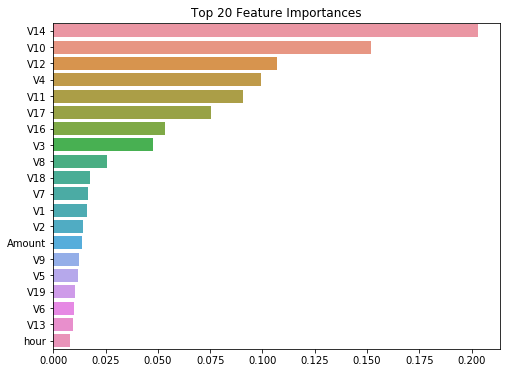

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train_smote.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()